In [20]:
# import library

import os
from shutil import copy
import xml.etree.ElementTree as ET
import xml
from xml.dom import minidom
import cv2

In [21]:
datapath = '../../dataset/Annotations'
xmllspath = '../../dataset/t1_train.txt'
imagepath = '../../dataset/JPEGImages'
savedir = '../../dataset/cropImages'

VOC_CLASS_NAMES = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]
VOC_CLASS_NAMES_COCOFIED = [
    "airplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "dining table", "dog", "horse", "motorcycle", "person",
    "potted plant", "sheep", "couch", "train", "tv"
]

VOCclass = set(VOC_CLASS_NAMES).union(set(VOC_CLASS_NAMES_COCOFIED))


In [22]:
with open(xmllspath, newline='') as f:
    data = f.read()


xmlls = data.split("\n")

while '' in xmlls:
    xmlls.remove('')

xmlls = [data+'.xml' for data in xmlls]

In [24]:
for idx, singleXml in enumerate(xmlls):
    
    xmlname = os.path.join(datapath,singleXml)
    doc = ET.parse(xmlname)
    root = doc.getroot()
    imagename = root.find('filename').text
    filepath = os.path.join('../../dataset/JPEGImages',imagename)
    objects = root.iter('object')

    for annotation in objects:
        name = annotation.find('name').text
        

        
        if name in VOCclass:
            # change name to COCO categories
            if name in VOC_CLASS_NAMES:
                id = VOC_CLASS_NAMES.index(name)
                name = VOC_CLASS_NAMES_COCOFIED[id]
            
            # get bbox
            bndbox = annotation.find('bndbox')
            
            x_l = int(bndbox.find('ymin').text)
            y_b = int(bndbox.find('xmin').text)
            x_r = int(bndbox.find('ymax').text)
            y_u = int(bndbox.find('xmax').text)

            src = cv2.imread(filepath)
            crop = src[x_l:x_r,y_b:y_u,:]

            y = y_u-y_b
            x = x_r-x_l
            length = max(x, y)

            top = int(length/2 - x/2)
            bottom = int(length/2 - x/2)
            left = int(length/2 - y/2)
            right = int(length/2 - y/2)

            borderType = cv2.BORDER_CONSTANT
            crop = cv2.copyMakeBorder(crop, top, bottom, left, right, borderType)
            crop = cv2.resize(crop,(256,256))

            # if no dir make one
            savepath = os.path.join(savedir,name)
            if not(os.path.exists(savepath)):
                os.makedirs(savepath)
            
            imgname = name + "_" + imagename
            cropimagepath = os.path.join(savepath,imgname)

            
            # save to dir
            cv2.imwrite(cropimagepath,crop)



In [19]:
name = 'aeroplane'


0

In [18]:
xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
print(xmlstr)

<?xml version="1.0" ?>
<annotation>
   <filename>000000056679.jpg</filename>
   <size>
      <width>426</width>
      <height>640</height>
      <depth>3</depth>
   </size>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>180</xmin>
         <ymin>272</ymin>
         <xmax>268</xmax>
         <ymax>384</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>398</xmin>
         <ymin>310</ymin>
         <xmax>426</xmax>
         <ymax>411</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>352</xmin>
         <ymin>321</ymin>
         <xmax>366</xmax>
         <ymax>352</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>310</xmin>
         <ymin>334</ymin>
         <xmax>328</xmax>
         <ymax

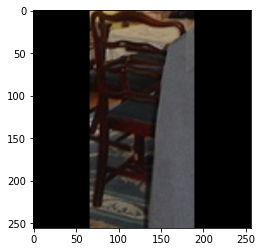

In [13]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))